#**Building a Restaurant Recommendation System**
Welcome to this Colab notebook where we'll embark on an exciting journey to build a restaurant recommendation system from scratch. In this project, we'll leverage Python and popular machine learning libraries to create a personalized recommendation engine that suggests restaurants based on user preferences and historical data.



# **Understanding and Preprocessing the Data**
In this step, we'll start by loading the dataset and understanding its structure. We'll perform basic data preprocessing tasks such as handling missing values and removing duplicates. Additionally, we'll explore descriptive statistics and visualize the data to gain insights into various features.



In [ ]:
import pandas as pd
df = pd.read_csv("/content/zomato.csv", encoding='latin1')
df2 = pd.read_csv("/content/Country-Code.csv")
mdf = pd.merge(df, df2, on="Country Code", how="left")
print(mdf.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [ ]:
missing_values = mdf.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64


In [ ]:
missing_cuisines = mdf[mdf['Cuisines'].isnull()]
print("Rows with missing values in the 'Cuisines' column:")
print(missing_cuisines)


Rows with missing values in the 'Cuisines' column:
     Restaurant ID                 Restaurant Name  Country Code  \
84        17284105                   Cookie Shoppe           216   
87        17284211  Pearly's Famous Country Cookng           216   
94        17284158               Jimmie's Hot Dogs           216   
297       17374552                  Corkscrew Cafe           216   
328       17501439                        Dovetail           216   
346       17606621            HI Lite Bar & Lounge           216   
368       17059060                       Hillstone           216   
418       17142698                Leonard's Bakery           216   
455       17616465        Tybee Island Social Club           216   

               City                                          Address  \
84           Albany               115 N Jackson St, Albany, GA 31701   
87           Albany             814 N Slappey Blvd, Albany, GA 31701   
94           Albany               204 S Jackson St, 

In [ ]:
cdf = mdf.dropna(subset=['Cuisines'])
print("Shape of the cleaned dataframe after deletion:", cdf.shape)


Shape of the cleaned dataframe after deletion: (9542, 22)


In [ ]:
print("Summary Information:")
cdf.info()

Summary Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9542 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  

In [ ]:
descriptive_stats = cdf.describe()
print("Descriptive Statistics:")
print(descriptive_stats)

Descriptive Statistics:
       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.542000e+03   9542.000000  9542.000000  9542.000000   
mean    9.043301e+06     18.179208    64.274997    25.848532   
std     8.791967e+06     56.451600    41.197602    11.010094   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019312e+05      1.000000    77.081565    28.478658   
50%     6.002726e+06      1.000000    77.192031    28.570444   
75%     1.835260e+07      1.000000    77.282043    28.642711   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9542.000000  9542.000000       9542.000000   9542.000000  
mean            1200.326137     1.804968          2.665238    156.772060  
std            16128.743876     0.905563          1.516588    430.203324  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000

In [ ]:
duplicate_rows = cdf.duplicated()
num_duplicates = duplicate_rows.sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


In [ ]:
import random

# Define bounding boxes for each country (min_lat, min_lon, max_lat, max_lon)
country_bounding_boxes = {
    'India': (6, 68, 36, 97),
    'Australia': (-43, 113, -10, 154),
    'Brazil': (-34, -74, 5, -34),
    'Canada': (42, -141, 83, -52),
    'Indonesia': (-11, 94, 6, 141),
    'NewZealand': (-47, 166, -34, 178),
    'Phillipines': (5, 116, 19, 127),
    'Qatar': (24, 50, 26, 52),
    'Singapore': (1, 103, 2, 104),
    'South Africa': (-35, 16, -22, 33),
    'Sri Lanka': (6, 79, 10, 82),
    'Turkey': (36, 26, 42, 45),
    'UAE': (22, 51, 26, 57),
    'United Kingdom': (50, -8, 60, 2),
    'United States': (24, -125, 49, -67)
}

# Replace (0,0) latitude and longitude values with random coordinates within each country's bounding box
for index, row in cdf.iterrows():
    if row['Latitude'] == 0 and row['Longitude'] == 0:
        country = row['Country']
        min_lat, min_lon, max_lat, max_lon = country_bounding_boxes[country]
        random_lat = round(random.uniform(min_lat, max_lat), 6)
        random_lon = round(random.uniform(min_lon, max_lon), 6)
        cdf.at[index, 'Latitude'] = random_lat
        cdf.at[index, 'Longitude'] = random_lon


# **Exploratory Data Analysis (EDA)**
In this step, we'll delve deeper into the dataset through exploratory data analysis. We'll visualize distributions, correlations, and other patterns in the data using plots and statistical summaries. This analysis will provide valuable insights into the relationships between different features and help us understand the data better.




Summary Statistics for Numeric Columns:
       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.542000e+03   9542.000000  9542.000000  9542.000000   
mean    9.043301e+06     18.179208    68.589281    26.915268   
std     8.791967e+06     56.451600    38.536615     9.506181   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019312e+05      1.000000    77.093138    28.486682   
50%     6.002726e+06      1.000000    77.204182    28.572980   
75%     1.835260e+07      1.000000    77.296253    28.644936   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9542.000000  9542.000000       9542.000000   9542.000000  
mean            1200.326137     1.804968          2.665238    156.772060  
std            16128.743876     0.905563          1.516588    430.203324  
min                0.000000     1.000000          0.000000      0.000000  
25%     

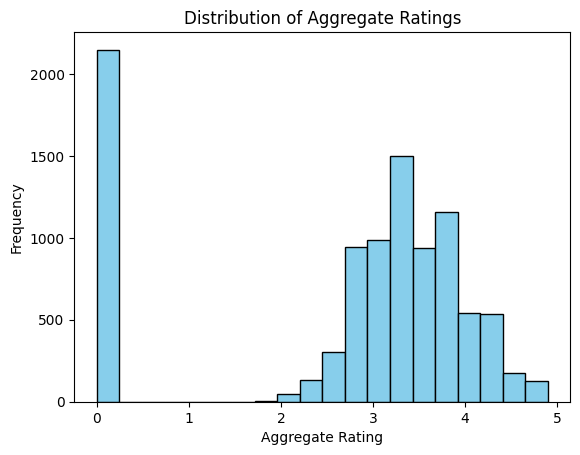

In [ ]:
summary_stats_numeric = cdf.describe()
print("Summary Statistics for Numeric Columns:")
print(summary_stats_numeric)

import matplotlib.pyplot as plt

plt.hist(cdf['Aggregate rating'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Aggregate Ratings')
plt.show()


Frequency of Cuisine Types:
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: Cuisines, dtype: int64


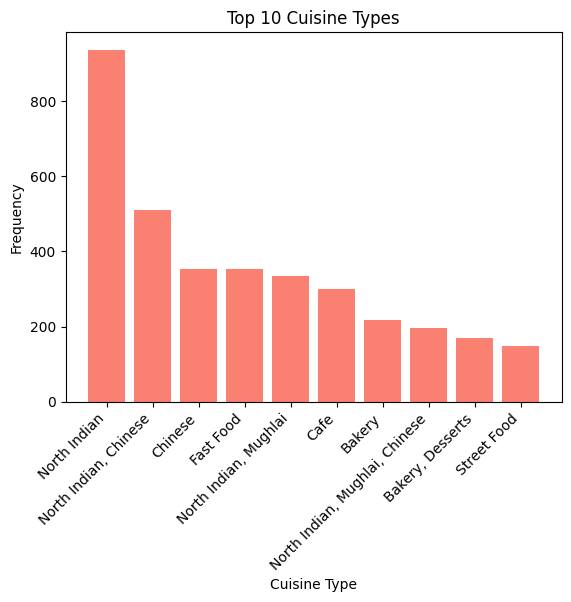

In [ ]:
cuisine_counts = cdf['Cuisines'].value_counts()
print("Frequency of Cuisine Types:")
print(cuisine_counts.head(10))  # Display top 10 cuisine types

top_cuisine_counts = cuisine_counts.head(10)
plt.bar(top_cuisine_counts.index, top_cuisine_counts.values, color='salmon')
plt.xlabel('Cuisine Type')
plt.ylabel('Frequency')
plt.title('Top 10 Cuisine Types')
plt.xticks(rotation=45, ha='right')
plt.show()


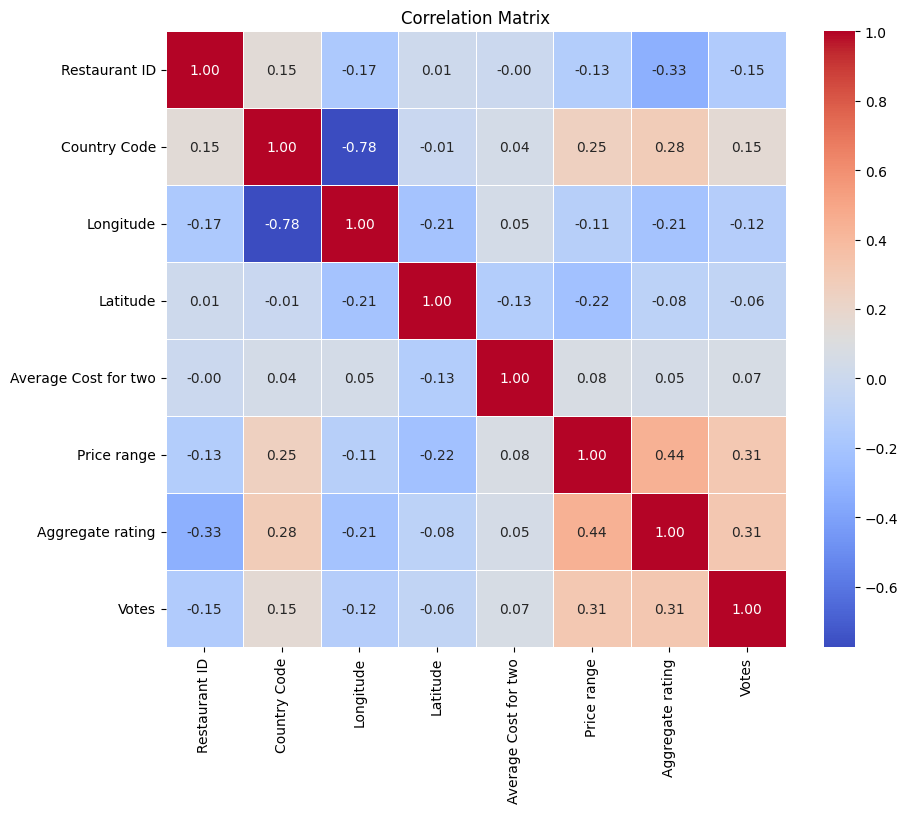

In [ ]:
correlation_matrix = cdf.corr()

import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


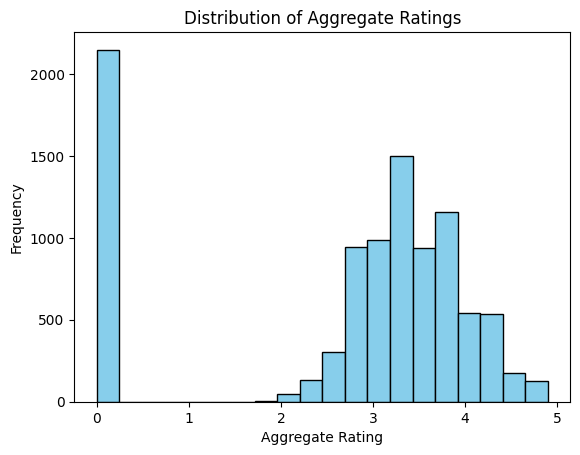

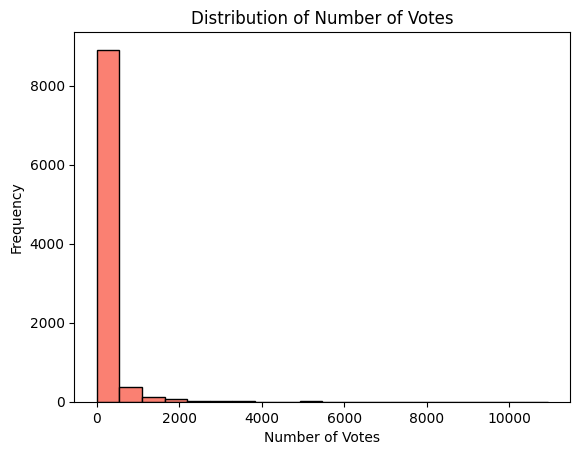

In [ ]:
# Histogram of aggregate ratings
plt.hist(cdf['Aggregate rating'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Aggregate Ratings')
plt.show()

# Histogram of number of votes
plt.hist(cdf['Votes'], bins=20, color='salmon', edgecolor='black')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Votes')
plt.show()


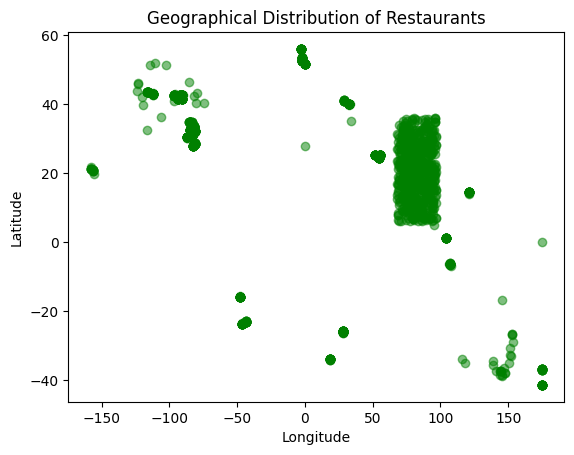

In [ ]:
plt.scatter(cdf['Longitude'], cdf['Latitude'], alpha=0.5, color='green')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Restaurants')
plt.show()


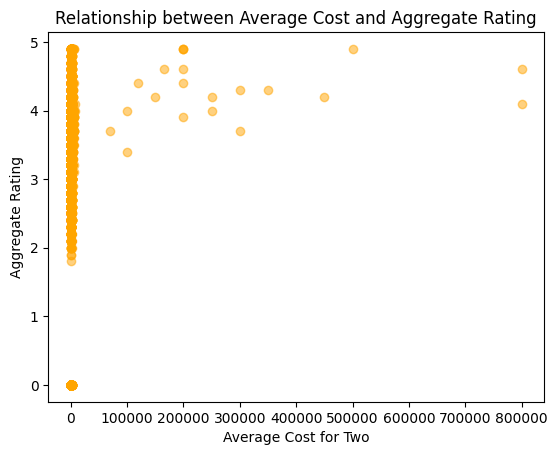

In [ ]:
plt.scatter(cdf['Average Cost for two'], cdf['Aggregate rating'], alpha=0.5, color='orange')
plt.xlabel('Average Cost for Two')
plt.ylabel('Aggregate Rating')
plt.title('Relationship between Average Cost and Aggregate Rating')
plt.show()


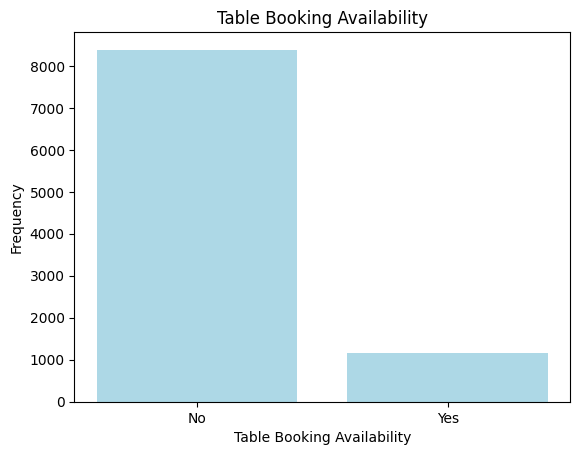

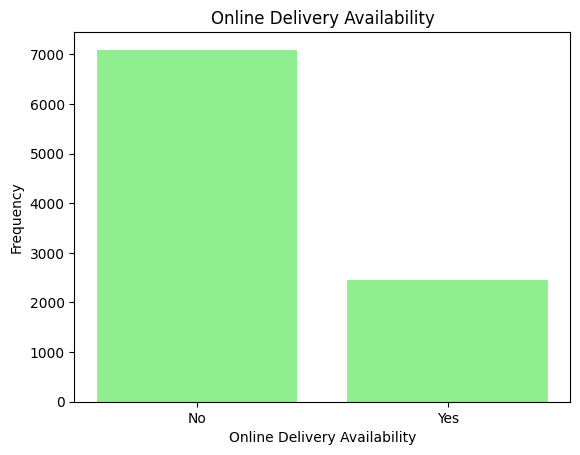

In [ ]:
# Bar plot of table booking availability
table_booking_counts = cdf['Has Table booking'].value_counts()
plt.bar(table_booking_counts.index, table_booking_counts.values, color='lightblue')
plt.xlabel('Table Booking Availability')
plt.ylabel('Frequency')
plt.title('Table Booking Availability')
plt.show()

# Bar plot of online delivery availability
online_delivery_counts = cdf['Has Online delivery'].value_counts()
plt.bar(online_delivery_counts.index, online_delivery_counts.values, color='lightgreen')
plt.xlabel('Online Delivery Availability')
plt.ylabel('Frequency')
plt.title('Online Delivery Availability')
plt.show()


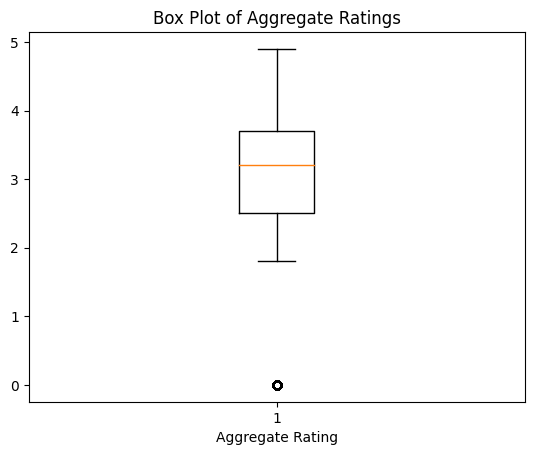

In [ ]:
# Box plot of aggregate ratings to identify outliers
plt.boxplot(cdf['Aggregate rating'])
plt.xlabel('Aggregate Rating')
plt.title('Box Plot of Aggregate Ratings')
plt.show()


In [ ]:
top_rated_restaurants = cdf.sort_values(by='Aggregate rating', ascending=False)
top_10_rated_restaurants = top_rated_restaurants.head(10)
print("Top 10 Restaurants Based on Rating:")
print(top_10_rated_restaurants[['Restaurant Name', 'Aggregate rating']])


Top 10 Restaurants Based on Rating:
         Restaurant Name  Aggregate rating
1381         Caterspoint               4.9
9296    Talaga Sampireun               4.9
9303               Miann               4.9
9299               Milse               4.9
428    Mama's Fish House               4.9
50     Garota de Ipanema               4.9
429        Marukame Udon               4.9
48    Braseiro da Gíçvea               4.9
9291    Talaga Sampireun               4.9
363      Yellow Dog Eats               4.9


In [ ]:
cdf['Weighted Score'] = cdf['Aggregate rating'] * cdf['Votes']
top_rated_restaurants_weighted = cdf.sort_values(by='Weighted Score', ascending=False)
top_10_rated_restaurants_weighted = top_rated_restaurants_weighted.head(10)
print("Top 10 Restaurants Based on Weighted Score (Rating * Votes):")
print(top_10_rated_restaurants_weighted[['Restaurant Name', 'Aggregate rating', 'Votes', 'Weighted Score']])


Top 10 Restaurants Based on Weighted Score (Rating * Votes):
                Restaurant Name  Aggregate rating  Votes  Weighted Score
728                        Toit               4.8  10934         52483.2
735                    Truffles               4.7   9667         45434.9
3994           Hauz Khas Social               4.3   7931         34103.3
2412                  Peter Cat               4.3   7574         32568.2
739   AB's - Absolute Barbecues               4.6   6907         31772.2
2414            Barbeque Nation               4.9   5966         29233.4
2307  AB's - Absolute Barbecues               4.9   5434         26626.6
743                 Big Brewsky               4.5   5705         25672.5
4638                  Big Chill               4.5   4986         22437.0
3110            Saravana Bhavan               4.3   5172         22239.6


<ipython-input-97-cf6389de02e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf['Weighted Score'] = cdf['Aggregate rating'] * cdf['Votes']


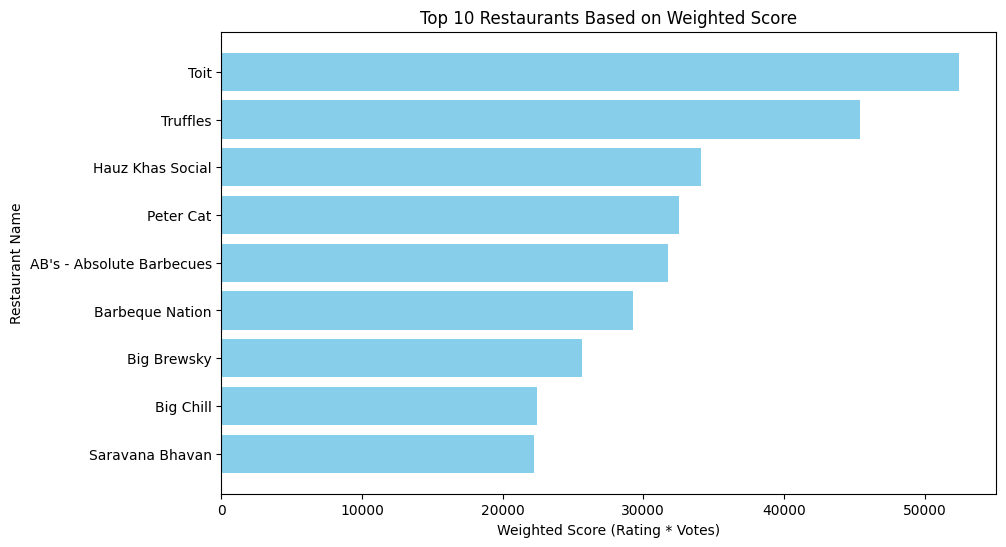

In [ ]:
import matplotlib.pyplot as plt
top_10_rated_restaurants_weighted = top_rated_restaurants_weighted.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_10_rated_restaurants_weighted['Restaurant Name'], top_10_rated_restaurants_weighted['Weighted Score'], color='skyblue')
plt.xlabel('Weighted Score (Rating * Votes)')
plt.ylabel('Restaurant Name')
plt.title('Top 10 Restaurants Based on Weighted Score')
plt.gca().invert_yaxis()  # Invert y-axis to display highest score at the top
plt.show()


<ipython-input-99-3738d0c17d82>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf['Number of Cuisines'] = cdf['Cuisines'].apply(lambda x: len(x.split(',')))


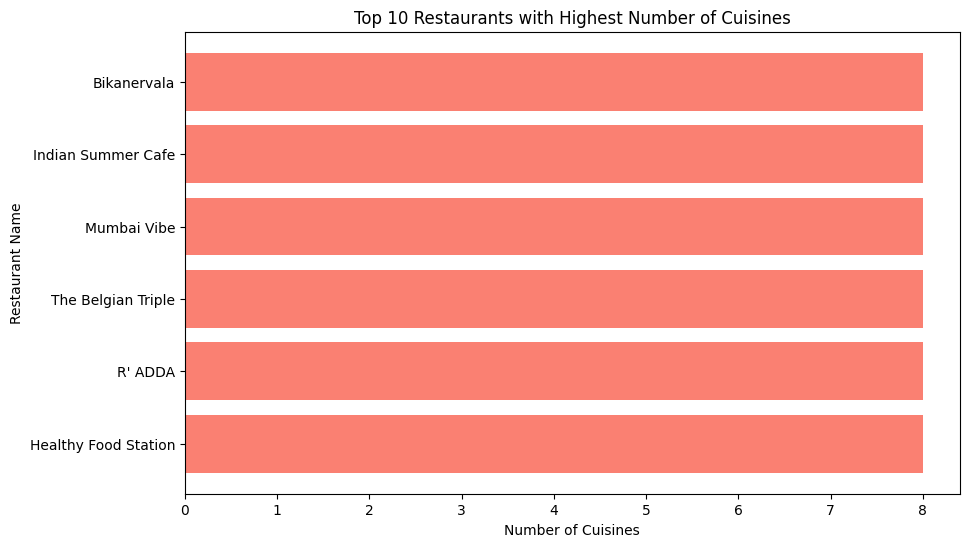

In [ ]:
cdf['Number of Cuisines'] = cdf['Cuisines'].apply(lambda x: len(x.split(',')))
top_cuisines_restaurants = cdf.sort_values(by='Number of Cuisines', ascending=False)
top_10_cuisines_restaurants = top_cuisines_restaurants.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_10_cuisines_restaurants['Restaurant Name'], top_10_cuisines_restaurants['Number of Cuisines'], color='salmon')
plt.xlabel('Number of Cuisines')
plt.ylabel('Restaurant Name')
plt.title('Top 10 Restaurants with Highest Number of Cuisines')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
both_booking_and_delivery_yes = cdf[(cdf['Has Table booking'] == 'Yes') & (cdf['Has Online delivery'] == 'Yes')]
top_10_restaurants = both_booking_and_delivery_yes.sort_values(by=['Aggregate rating', 'Votes'], ascending=False).head(10)
print("Top 10 Restaurants with Both Table Booking and Online Delivery (Yes):")
print(top_10_restaurants[['Restaurant Name', 'Aggregate rating', 'Votes']])


Top 10 Restaurants with Both Table Booking and Online Delivery (Yes):
                       Restaurant Name  Aggregate rating  Votes
809                            Chili's               4.8   1262
727   The Fatty Bao - Asian Gastro Bar               4.7   2369
2483                The Fusion Kitchen               4.7   2083
2302                           Chili's               4.7   1932
3014          Zabardast Indian Kitchen               4.7    242
814                   Bombay Brasserie               4.6   1753
2407                  India Restaurant               4.6   1219
3310                     Spezia Bistro               4.6   1071
743                        Big Brewsky               4.5   5705
9166                           Chili's               4.5   1439


# **Feature Engineering**
Feature engineering is a crucial step in building a recommendation system. In this step, we'll create new features or transform existing ones to improve the performance of our model. We'll encode categorical variables, normalize numerical features, and extract relevant information to enhance the quality of our dataset for modeling.



In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Content-Based Filtering Features
cuisine_encoder = OneHotEncoder(sparse=False)
cuisine_features = cuisine_encoder.fit_transform(cdf['Cuisines'].str.get_dummies(sep=','))
cuisine_df = pd.DataFrame(cuisine_features)
location_df = cdf[['Longitude', 'Latitude', 'Average Cost for two']]
average_rating_df = cdf[['Aggregate rating']]
all_features = pd.concat([cuisine_df, location_df, average_rating_df], axis=1)

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# **Building the recommendation system**
Now, we'll build the recommendation system using the processed dataset. We'll implement content-based filtering, collaborative filtering, or a hybrid approach to generate recommendations for users based on their preferences and historical interactions with items. This step involves training the recommendation model and preparing it for evaluation.



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(tokenizer=lambda x: x.split(', '))
cuisine_bow = vectorizer.fit_transform(cdf['Cuisines'])

cosine_sim = cosine_similarity(cuisine_bow, cuisine_bow)

def recommend_similar_restaurants(restaurant_name, cosine_sim=cosine_sim):
    restaurant_indices = cdf[cdf['Restaurant Name'] == restaurant_name].index
    if len(restaurant_indices) == 0:
        print("Restaurant not found.")
        return []
    index = restaurant_indices[0]

    sim_scores = list(enumerate(cosine_sim[index]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:11]

    restaurant_indices = [i[0] for i in sim_scores]

    return cdf['Restaurant Name'].iloc[restaurant_indices]


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
# Example: Recommend restaurants similar to 'Ooma'
similar_restaurants = recommend_similar_restaurants('Ooma')
print("Restaurants similar to 'Ooma':")
print(similar_restaurants)


Restaurants similar to 'Ooma':
71                        Kawa Sushi
185                      Tokyo Sushi
215         Fuji Japanese Steakhouse
247                            Osaka
260                         Miyabi 9
383                          Ichiban
480     Fuji Bay Japanese Restaurant
531                  Masato Japanese
549                           Sakura
1319                      Sushi Haus
Name: Restaurant Name, dtype: object


In [ ]:
import pandas as pd
price_mapping = {1: 10, 2: 30, 3: 60, 4: 100}
cdf['Average Cost USD'] = cdf['Price range'].map(price_mapping)

cdf = pd.get_dummies(cdf, columns=['Currency', 'Country'])

features = cdf[['Cuisines', 'Longitude', 'Latitude', 'Average Cost USD', 'Aggregate rating']]


<ipython-input-115-13c2ebffef6e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf['Average Cost USD'] = cdf['Price range'].map(price_mapping)


In [ ]:
# Recommendation for a given restaurant (e.g., 'Ooma')
similar_restaurants = recommend_similar_restaurants('Ooma')
print("Restaurants similar to 'Ooma':")
print(similar_restaurants)


Restaurants similar to 'Ooma':
71                        Kawa Sushi
185                      Tokyo Sushi
215         Fuji Japanese Steakhouse
247                            Osaka
260                         Miyabi 9
383                          Ichiban
480     Fuji Bay Japanese Restaurant
531                  Masato Japanese
549                           Sakura
1319                      Sushi Haus
Name: Restaurant Name, dtype: object


# **Evaluation**
In this step, we'll evaluate the performance of our recommendation system using appropriate metrics such as precision, recall, or accuracy. We'll compare the recommended items with the ground truth to assess how well the system predicts user preferences. This evaluation provides valuable feedback on the effectiveness of our recommendation algorithm.



In [ ]:
from sklearn.model_selection import train_test_split

X = features
y = cdf['Restaurant Name']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the sizes of the training and testing sets
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 7633
Testing set size: 1909


In [ ]:
def evaluate_recommendation_system(recommendations, actual):
    print("Recommended Restaurants:")
    for i, restaurant in enumerate(recommendations):
        print(i + 1, restaurant)

    print("\nActual Similar Restaurants:")
    for i, restaurant in enumerate(actual):
        print(i + 1, restaurant)

evaluate_recommendation_system(similar_restaurants, actual_preferred_restaurants)


Recommended Restaurants:
1 Kawa Sushi
2 Tokyo Sushi
3 Fuji Japanese Steakhouse
4 Osaka
5 Miyabi 9
6 Ichiban
7 Fuji Bay Japanese Restaurant
8 Masato Japanese
9 Sakura
10 Sushi Haus

Actual Similar Restaurants:
1 Restaurant A
2 Restaurant B
3 Restaurant C
4 Restaurant D
5 Restaurant E


# **User Interface**
To enhance user interaction, we'll create a graphical user interface (GUI) for our recommendation system. This GUI will allow users to input their preferences or queries and receive personalized recommendations in a user-friendly manner. We'll leverage libraries such as Tkinter or Streamlit to build an intuitive interface for our application.



In [ ]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load your dataset
df = pd.read_csv("/content/zomato.csv", encoding='latin1')

# Convert the 'Cuisines' column to a bag-of-words representation
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(', '))
cuisine_bow = vectorizer.fit_transform(df['Cuisines'].fillna(''))

# Calculate cosine similarity matrix
cosine_sim = cosine_similarity(cuisine_bow, cuisine_bow)

# Function to get top 5 similar restaurants
def get_similar_restaurants(restaurant_name):
    # Find the index of the given restaurant
    idx = df[df['Restaurant Name'] == restaurant_name].index
    if not idx.empty:
        idx = idx[0]
        # Get pairwise similarity scores with other restaurants
        sim_scores = list(enumerate(cosine_sim[idx]))
        # Sort the restaurants based on similarity scores
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        # Get the top 5 most similar restaurants (excluding itself)
        sim_scores = sim_scores[1:6]
        # Get the indices of the top 5 similar restaurants
        restaurant_indices = [i[0] for i in sim_scores]
        # Return the names of the top 5 similar restaurants
        return df.iloc[restaurant_indices]['Restaurant Name'].tolist()
    else:
        return []

# Function to handle button click event
def suggest_similar_restaurants(b):
    restaurant_name = restaurant_input.value
    similar_restaurants = get_similar_restaurants(restaurant_name)
    if similar_restaurants:
        for i, restaurant in enumerate(similar_restaurants, start=1):
            print(f"{i}. {restaurant}")
    else:
        print("Restaurant not found or no similar restaurants found.")

# Create input field for restaurant name
restaurant_input = widgets.Text(placeholder='Enter restaurant name')

# Create button to suggest similar restaurants
suggest_button = widgets.Button(description="Suggest Similar Restaurants")
suggest_button.on_click(suggest_similar_restaurants)

# Display input field and button
display(restaurant_input)
display(suggest_button)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Text(value='', placeholder='Enter restaurant name')

Button(description='Suggest Similar Restaurants', style=ButtonStyle())

1. Rovereto
2. Flying Pie Pizzaria
3. Guido's Original New York Style Pizza
4. A & A Pagliai's Pizza
5. Mellow Mushroom
